### Stock Market Prediction And Forecasting Using Stacked LSTM

In [0]:
### Keras and Tensorflow >2.0

In [1]:
### Data Collection
import pandas_datareader as pdr


/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [0]:
import pandas as pd

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df=pd.read_csv('/content/drive/My Drive/INFY.BO.csv')

In [0]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,28-05-2015,495.00,506.750000,494.075012,503.575012,421436.0,399.109436
1,29-05-2015,504.25,513.375000,500.937988,505.600006,746392.0,400.714386
2,01-06-2015,507.50,515.750000,505.825012,511.424988,316300.0,405.330963
3,02-06-2015,511.25,513.700012,501.274994,502.200012,555136.0,398.019714
4,03-06-2015,505.00,515.000000,502.062012,505.774994,696708.0,400.852997


In [0]:
df.tail()

,Date,Open,High,Low,Close,Volume,Adj Close
1224,20-05-2020,666.549988,673.200012,659.799988,670.200012,230449.0,670.200012
1225,21-05-2020,668.400024,679.700012,665.299988,672.000000,217317.0,672.000000
1226,22-05-2020,672.150024,695.250000,672.150024,692.250000,300974.0,692.250000
1227,26-05-2020,695.000000,699.599976,678.950012,680.150024,208176.0,680.150024
1228,27-05-2020,682.750000,708.900024,675.099976,705.299988,1274033.0,705.299988


In [0]:
df1=df.reset_index()['Close']

In [0]:
df1

array([[0.16565446],
       [0.17067427],
       [0.18511399],
       ...,
       [0.63336635],
       [0.60337137],
       [0.66571634]])

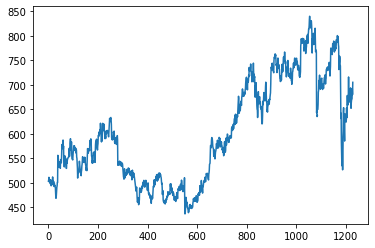

In [0]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [0]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [0]:
import numpy as np

In [0]:
df1

0       503.575012
1       505.600006
2       511.424988
3       502.200012
4       505.774994
           ...    
1224    670.200012
1225    672.000000
1226    692.250000
1227    680.150024
1228    705.299988
Name: Close, Length: 1229, dtype: float64

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [0]:
print(df1)

[[0.16565446]
 [0.17067427]
 [0.18511399]
 ...
 [0.63336635]
 [0.60337137]
 [0.66571634]]


In [0]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.50)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [0]:
training_size,test_size

(614, 615)

In [0]:
train_data

array([[0.16565446],
       [0.17067427],
       [0.18511399],
       [0.16224593],
       [0.17110806],
       [0.17417699],
       [0.164291  ],
       [0.15694598],
       [0.15217649],
       [0.17302921],
       [0.15793754],
       [0.14232273],
       [0.14576099],
       [0.15611057],
       [0.15158649],
       [0.1579078 ],
       [0.152764  ],
       [0.18703522],
       [0.15821767],
       [0.15071885],
       [0.14582303],
       [0.16435296],
       [0.14470748],
       [0.13863407],
       [0.1539415 ],
       [0.14210463],
       [0.14433565],
       [0.13634109],
       [0.13454385],
       [0.10374319],
       [0.07957363],
       [0.07870599],
       [0.09488099],
       [0.11973224],
       [0.13528758],
       [0.14167077],
       [0.15927119],
       [0.15914727],
       [0.29641796],
       [0.28396128],
       [0.27931329],
       [0.26753838],
       [0.23735745],
       [0.23549825],
       [0.26239457],
       [0.24243922],
       [0.25353252],
       [0.254

In [0]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [0]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [0]:
print(X_train.shape), print(y_train.shape)

(513, 100)
(513,)


(None, None)

In [0]:
print(X_test.shape), print(ytest.shape)

(514, 100)
(514,)


(None, None)

In [0]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [0]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [0]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
9/9 [==============================] - 2s 207ms/step - loss: 0.0019 - val_loss: nan
Epoch 2/100
9/9 [==============================] - 2s 210ms/step - loss: 0.0019 - val_loss: nan
Epoch 3/100
9/9 [==============================] - 2s 211ms/step - loss: 0.0022 - val_loss: nan
Epoch 4/100
9/9 [==============================] - 2s 205ms/step - loss: 0.0019 - val_loss: nan
Epoch 5/100
9/9 [==============================] - 2s 203ms/step - loss: 0.0017 - val_loss: nan
Epoch 6/100
9/9 [==============================] - 2s 203ms/step - loss: 0.0016 - val_loss: nan
Epoch 7/100
9/9 [==============================] - 2s 202ms/step - loss: 0.0016 - val_loss: nan
Epoch 8/100
9/9 [==============================] - 2s 205ms/step - loss: 0.0031 - val_loss: nan
Epoch 9/100
9/9 [==============================] - 2s 204ms/step - loss: 0.0019 - val_loss: nan
Epoch 10/100
9/9 [==============================] - 2s 204ms/step - loss: 0.0017 - val_loss: nan
Epoch 11/100
9/9 [=====================

In [0]:
import tensorflow as tf

In [0]:
tf.__version__

'2.2.0'

In [0]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [0]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [0]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

217595.2222552138

In [0]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

ValueError: ignored

In [0]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

NameError: ignored

In [0]:
len(test_data)

NameError: ignored

In [0]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


NameError: ignored

In [0]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [0]:
temp_input

NameError: ignored

In [0]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

NameError: ignored

In [0]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [0]:
import matplotlib.pyplot as plt

In [0]:
len(df1)

1229

ValueError: ignored

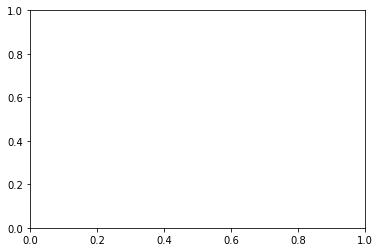

In [0]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

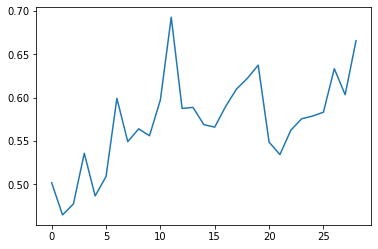

In [0]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [0]:
df3=scaler.inverse_transform(df3).tolist()

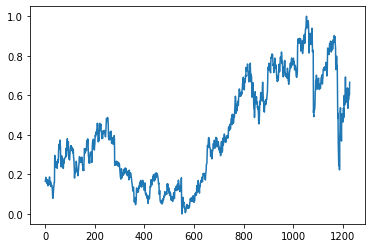

In [0]:
plt.plot(df3)